# Exploratory Data Analysis (EDA)

_Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations._<br>

This will covers the very basics like data frames and data structures, onboards readers on terms like “Mean”, “Standard Deviation”, and showcases how to handle datasets and some easy visualisations using Python.

### Content
- Types of structured data
- Loading the data and surfing on it
- Location Estimates
- Variability Estimates
- Exploring Data Distribution
- Percentiles and Boxplots
- Histograms
- Density Estimates
- Binary and Categorical Data
- Correlation
- Scatter Plots
- Exploring Two or More Variables

### Types of structured data.
Data comes from many sources: sensor measuments, events, text, images, and videos. Huge amount of information is spewed by Internet of Things (IoT). Many of this data is unstructured: images are a collection of pixels, with each pixel containing RGB color information.

Before applying any statistical concept, ustructured data must be processed and manipulated into structured form.

There are two types of Structured data: _numeric_ and _categorical_. 
- Numeric data is expressed on a numerical scales and comes in two forms: _continuous_, which can take on any value in an interval such as wind speed or time duration, and _discrete_, wich can take on only integer values such as the account of the occurrence of an event. 
- Categorical data takes only a fixed set of values, such as a type of TV screen (plasma, LCD, LED, etc.) or a state name. _Binary_ data is an important special case of categorical data that takes on only two values,such as cero/one, yes/no, true/false. Another useful type of categorical data is _ordinal_ data in wich the categories are ordered, an example of this is a numerical rating. 

### Loading the data and surfing on it

In [6]:
# The following commands loads the packages to be used in the analysis
import pandas as pd
from scipy import stats
from statsmodels import robust
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# The function read_csv from pandas loads data from a csv file into a DataFrame and .head is used to preview the data loaded
WINE = pd.read_csv(r"C:/Users/jober/OneDrive/Desktop/Data Science/Data Science - Study notes/Data_used/winequality/winequality-red.csv",sep=";")
WINE.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [8]:
# The function "shape" is used to get the dimension of the DF (Number of observations, Number of characteristics)
WINE.shape

(1599, 12)

- Dataset comprises of 4898 observations and 12 characteristics. <br>
- Out of which one is dependent variable and rest 11 are independent variables — physico-chemical characteristics.

In [9]:
# The following command allow us to identify the type and null data of each variable 
WINE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
# We get a few key insights just by looking at dependent variable as follows:
WINE.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

- Target variable/Dependent variable is discrete and categorical in nature.
- “quality” score scale ranges from 1 to 10;where 1 being poor and 10 being the best.
- 1,2 & 10 Quality ratings are not given by any observation. Only scores obtained are between 3 to 9.

In [11]:
# The function "value_counts()" describe the number of observations for each category in "Quality"
WINE.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

This tells us vote count of each quality score in descending order. “quality” has most values concentrated in the categories 5, 6 and 7. Only a few observations made for the categories 3 & 8.

### Estimates of location.
A basic step in exploring your data is getting a "typical value" for each feature (variable): an estimate of where most of the data is located(i.e., its cantral tendency). Statisticians us the term _stimate_ for a value calculated from the data at hand, while Data scientist and business analyst are more likely to refer to such value a as _metric_.

#### The Mean
This is the most basic estimate of location. The mean is calculated as the sum of all values divided by the number of values.
- _Trimmed mean:_ is calculated by dropping a fixed number of sorted values at each end and then taking an average of the remaining values. This eliminates the influence of extreme values.
- _weighted mean:_ is calculated by multiplying each data value by a user-specified weight adn dividing their sum by the sum of the weights. This is prefered when some values are intrinsically more variable than others, and highly variable observations are given a lower weight, and when the data collected does not equally represent the different groups the we are interested in measuring.


In [12]:
# The mean comes from the pandas method of the data frame
WINE['pH'].mean()

3.3111131957473416

In [13]:
# The trimmed mean requires the scipy.stat package:
stats.trim_mean(WINE['pH'],0.1)
# In this case we are dropping the 10%(0.1) of data from each end of the sorted data set

3.3090944574551138

In [14]:
# If we want to calculate the average PH value for the sample, we need a weighted mean.
# Weighted mean is avaliable with Numpy.
np.average(WINE['pH'],weights=WINE['quality'])

3.3098368841544605

#### The Median and Robust stimates
The median is the middle number in a sorted list of the data. Compared to the mean, which uses all observations, the median depends only on the value in the center of the sorted data, resulting in a much less sensitive estimator to extreme values (cases) called __outliers__. Any data extremly distant from the other values of the data set is considered an outlier.

An outlier is not an invalid value or an error. Still, outliers are often the result of data errors such as mixing data of different units or bad readings from sensors. Hence, those instances should be identified and are usually worthy of further investigation.

In [15]:
# The median comes from pandas.
WINE['pH'].median()

3.31

> The trimmed mean is used to evoid the influence of outliers. This can be thought of a compromise between the mean and the median: it is robust to extreme values in the data, but uses more data to calculate the estimated for location. 

### Variability Estimates
Variability, also refered to as _dispersion_, measure whether the data values are tightly clustered or spread out. At the heart of statistics lies variability: measuring it, reducing it, distinguishing ramdom from the real variability, identifying the various sources of real variability, and making decisions in the presence of it.

- _Deviation:_ The difference between the observed values and the estimate of location (errors, residuals).
- _Interquartile range (IQR):_ The difference between the 75th percentile and the 25th percentile.
- _Percentile:_ The value such that P percent of the values take on this value or less and (100-P) percent take on this value or more.
- _Range:_ The difference between the largest and the smallest value in a data set.
- _Variance:_ The sum of squared deviations from the mean divided by n-1, where n is the number of data values.
- _Standart Deviation:_ The square root of variance.

#### Standard deviation and Related estimates
The most widely used estimates of variation  are based on the differences, or _deviations_, between the estimate of location and the observed data. One way to measure variability is to estimate a typical value for theses deviations. The best-known estimates of variability are the _variance_ and the _standart deviation_, which are based on squared deviations. The __variance__ is an average of the squared deviations, and the __standart deviation__ is the square root of the variance. The standart deviation is much easier to interpret than the variance since it is on the same scale as the original data.

Neither the variance, the standart deviation, nor the mean absolute deviation is robust to outliers and extreme values. The variance and standart deviation are especially sensitive to outliers since they are based on the squared deviation.

A robust estimate of variability is the _Median absolute deviation from the median or MAD_. Like the median, the MAD is not influenced by extreme values.


In [16]:
# The pandas data frame provides methods for calculating standart deviation.
WINE['volatile acidity'].std()

0.17905970415353498

In [17]:
# The Median absolute deviation from the median - MAD is called from the statsmodels package:
robust.scale.mad(WINE['volatile acidity'])

0.17791226622067222

#### Estimates Based on Percentiles.
A different approach to estimating dispersion is based on looking at the spread of the sorted data. Statistics based on sorted (ranked) data are reffered to as order statistics. The most basic measure is the range. To avoid sensitivity to outliers, these types of stimates are based on differences between _percentiles_. For very large data sets, calculating exact percentiles can be computationally very expensive since it requires sorting all the data value. 

In [18]:
# The pandas data frame provides methods for calculating standart quantiles. Percentiles are calculated through quantiles.
IQR = WINE['volatile acidity'].quantile(0.75) - WINE['volatile acidity'].quantile(0.25)
IQR

0.25

### Summary statistics all-in-one!

In [19]:
# The describe() function in pandas is very handy in getting various summary statistics.
# This function returns the count, mean, standard deviation, minimum and maximum values 
# and the quantiles of the data.

WINE.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- Here as you can notice mean value is more than median value of each column which is represented by 50%(50th percentile) in index column. <br>
- There is notably a large difference between 75th %tile and max values of predictors “residual sugar”,”free sulfur dioxide”,”total sulfur dioxide”. <br>
- Thus observations 1 and 2 suggests that there are extreme values-Outliers in our data set.

### Exploring the data distribution

Although the estimates covered previously sums up the data in a single number to describe the location or variability of the data, it is useful to explore how the data is distribuited overall.

#### Boxplots and percentiles.
Percentiles are also valuable for summarizing the entire distribution. It is common to report quartiles (25th, 50th and 75th percentiles) and the deciles (the 10th, 20th, 30th,..., 90th percentiles). Percentiles are specially valuable for summarizing the _tails_ of the distribution. 

In [20]:
WINE['volatile acidity'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    0.27
0.25    0.39
0.50    0.52
0.75    0.64
0.95    0.84
Name: volatile acidity, dtype: float64

The median (quantile 50th) is 0,52, although ther is quite variability: the 5th percentile is 0.27 and the 95th percentile is 0.84.

__Boxplots__ are based on percentiles and give a quick way to visualize the distribution of data. 

Text(0, 0.5, 'volatile acidity (%)')

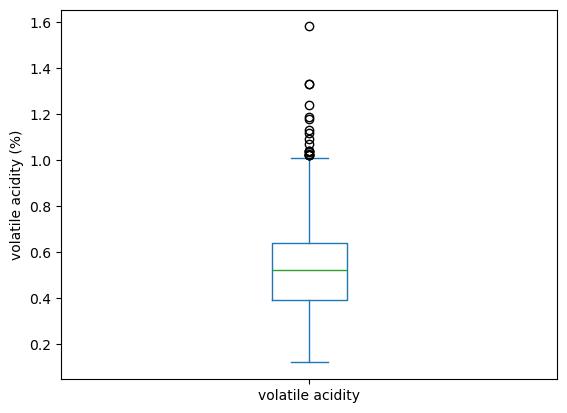

In [21]:
# A Boxplot is elaborated with the following code:
ax = (WINE['volatile acidity']).plot.box()
ax.set_ylabel('volatile acidity (%)')

From this boxplot we can immediately see that the median is about 0.52%, half of the data falls between abot 0.40% y 0.64%, and there are some high population outliers.

#### Frequency tables and Histograms
A frequency table of a variable divides up the variable range into equally spaced segments and tells us how many values fall within each segment. 

In [22]:
# The funcion .cut from pandas creates a series that maps the values into the segments.
binnedRS = pd.cut(WINE['residual sugar'],7)
binnedRS.value_counts()

residual sugar
(0.885, 2.986]      1359
(2.986, 5.071]       156
(5.071, 7.157]        55
(7.157, 9.243]        18
(13.414, 15.5]         6
(9.243, 11.329]        3
(11.329, 13.414]       2
Name: count, dtype: int64

A Histogram is a way to visualize a frequency table, with bins on the x-axis and the data count on the y-axis. In general, histograms are plotted such that empty bins are in the graph, bins are of equal width, the number of bins is up to the user, Bars are contiguous - no empty espace shows in between the bars-.

Text(0.5, 0, 'residual sugar')

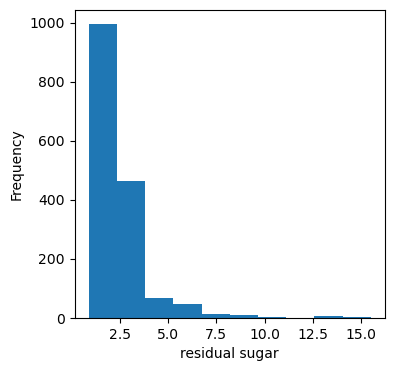

In [23]:
ax = (WINE['residual sugar']).plot.hist(figsize=(4,4))
ax.set_xlabel('residual sugar')

In statistical theory, location and variability are referred to as the first and second _moments- of a distribution. The third and fourth moments are called _skewness_ and _Kurtosis_. Skewness refers to whether the data is skewed to larger or smaller values, and kurtosis indicates the propensity of the data to have extreme values.

#### Density Plots and Estimates.
A density plot shows the distribution of data values as a continuous line. It can be thought of as a smoothed histogram, although it is typically computed directly from the data through a _Kernel density estimate_.

Text(0.5, 0, 'Residual sugar per %')

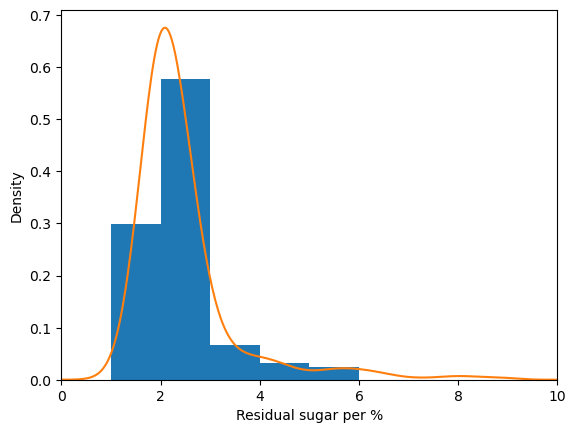

In [24]:
ax = WINE['residual sugar'].plot.hist(density=True,xlim=[0,10], bins=range(1,7))
WINE['residual sugar'].plot.density(ax = ax)
ax.set_xlabel('Residual sugar per %')

#### Binary and Categorical Data
For categorical data, simple proportions or percentages tell the story of the data. Getting a summary of a binary varible or a categorical variable is easy matter: we just figure out the proportion 1s, or the proportions of the important categories. 

__Bar charts__, are a common visual tool for displaying a single categorical variable. Categories are listed on the x-axis, and frequencies or proportions on the y-axis. Note that a bar resembles a histogram; however, in histograms the x-axis represents values of a single variable on a numeric scale. 

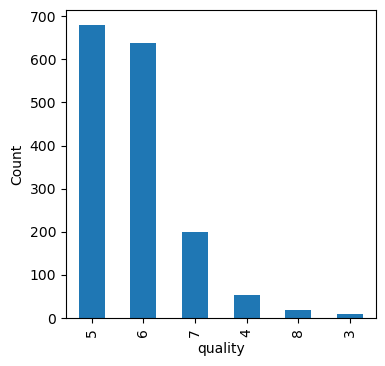

In [25]:
# A Bar Chart is formulated as follows:
ax = WINE['quality'].value_counts().plot.bar(figsize=(4,4),legend=False)
ax.set_ylabel('Count')
plt.show()

> Frequency tables converts the numeric data to an ordered factor. In this sense, histograms and bar charts are similar, except that the categories on the x-axis in the bar chart are not ordered. __Converting numeric data to categorical data is an important and widely used step in data analysis since it reduces the complexity (and size) of the data. _This aids in the discovery of relationships_ between features.__

__Pie charts__ are an alternative to bar charts, although statisticians and data visualization experts generally eschew pie charts as less visually informative.

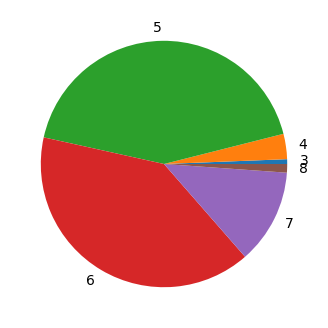

In [26]:
# Pie charts are created from pandas as:
ax = WINE.groupby('quality').size().plot.pie(figsize=(4,4))
plt.show()

#### Mode
The mode is he value, or values if there is a tie, that appears more often in the data. This is a simple statistic for categorical data, __and it is generally not used for numeric data.__

In [27]:
# mode is calculated:
WINE['quality'].mode()

0    5
Name: quality, dtype: int64

#### Expected value
A special type of categorical data in which the categories represent or can be mapped to discrete values on the same scale. The expected value is really a form of weighted mean. The expected value is a fundamental concept in bussiness valuation and capital budgeting - for example -, the expected value of five years of profits from a new acquisition, or the expected cost of saving from the new patient management software at a clinic.

## Probability!
The probability that an event will happen is the proportion of times it will occur if the situation could be repeated over and over, countless time. Most often this is an imaginary contruction, but it is an adequate operational understanding of probability.This is know as __Classic definition__ of probability.

In [28]:
# The probability of extracting an element from category "7" from the data set is:

num_of_2 = WINE['quality'][WINE['quality']==7].count() # number of elements in the category "7"  
tot_categories= WINE['quality'].shape[0] #Total number of elements in the column

Prob_of_2 = (num_of_2 / tot_categories)
Prob_of_2

0.12445278298936835

### Correlation.
Is a mutual relationship or connection (interdependence) between two or more variables. Many modelling projects involve examining correlation among predictors, and between predictors and a target variable. Two variables are said to be positively correlated if high values of one of them go with high values of the other one, and vice-versa. If high values of one of them go with low values of the other one, and vice versa, the variables are negatively correlated. When no effect is seen over one of them when cahnges are made to the other, it is said that those variables are not correlated. __Correlation is easily explored by using _Heatmaps_ .__

<Axes: >

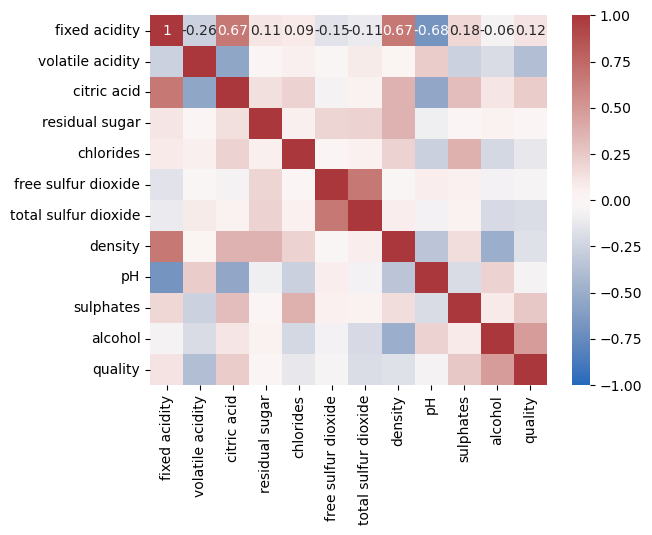

In [29]:
# Exploring the correlation between variables is important for building linear regression models.
matrix = WINE.corr().round(2)
sns.heatmap(matrix,annot=True,vmax=1, vmin=-1, center=0,cmap='vlag')

__It’s a good practice to remove correlated variables during feature selection.__ <br>
- Here we can infer that “fixed acidity” has strong positive correlation with “density” and "citric acid" whereas it has strong negative correlation with “PH”. <br>
- “free sulphur dioxide”, “residual sugar” and “PH” has almost no correlation with “quality”. <br>
- _Since correlation is zero we can infer there is no linear relationship between these three predictors.However it is safe to drop these features in case you’re applying Linear Regression model to the dataset._

> Like the mean and standard deviation, the correlation coefficient is sensitive to outliers in the data. 

#### Scatterplots
Scatterplots are used as a standard way to visualize the relationship between two measured data variables. The x-axis represent one variable and the y-axis represents another. 

Text(0, 0.5, 'Residual sugar (%)')

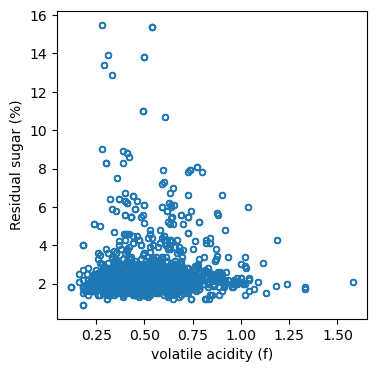

In [30]:
# The Scatterplot is build as follows:
ax = WINE.plot.scatter(x="volatile acidity", y="residual sugar", figsize=(4,4), marker='$\u25EF$')
ax.set_xlabel('volatile acidity (f)')
ax.set_ylabel('Residual sugar (%)')

### Exploring two or more variables
Mean and Variance look at variables one at a time (univariate analysis). Correlation analysis is a method that compares two variables (bivariate analysis). But there are some methods that looks at additional estimates and plots, and at more than two variables (multivariate analysis).

Like univariate analysis, bivariate analysis involves both computing summary statistics and producing visual displays. The appropiate type of bivariate or multivariate analysis depends on the nature of the data: numeric and categorical. 

#### Hexagonal Binning and Contours (Plotting numeric vs Numeric data)
Scatterplots are fine when there is a relatively small number of data values. For data sets with huundreds of thousands or millions of records, a scatterplot will be to dense, so we need a differente way to visualize the relationship. 

A hexagonal binning plot the relationship between two numeric variables. __Rather than plotting points, we gruoped the records into hexagonal bins and plotted the hexagons with a color indicating the number of records in that bin.__

Text(0, 0.5, 'density')

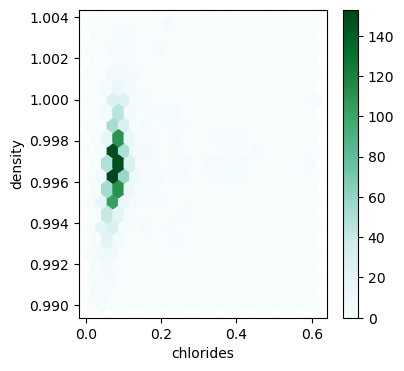

In [31]:
# A hexagonal binning plot the relationship between two numeric variables
ax = WINE.plot.hexbin(x="chlorides", y="density", gridsize=20, sharex=False , figsize=(4,4))
ax.set_xlabel('chlorides')
ax.set_ylabel('density')

We can use __contours overlaid onto a scatterplot__ to visualize the relationship between two variables. The contours are essencially a topographical map to two variables; each contour band represents a specific density of points, increasing as one nears a "peak".

c:\Users\jober\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jober\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'density')

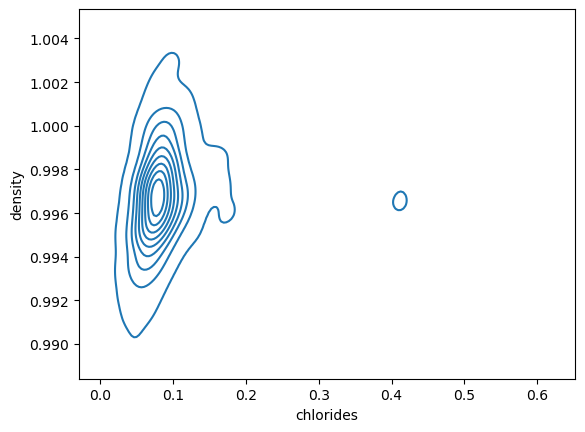

In [32]:
# The seaborn kdeplot function creates a contour plot:
ax = sns.kdeplot(data=WINE, x='chlorides',y='density')
ax.set_xlabel('chlorides')
ax.set_ylabel('density')

This plot shows a similar story as _Hexagonal binning plot_ by expresing a concentration around 0.9 in chlorides, but expose that there is a secundary "peak" east of the main peak. 

Both _contours plots_, _Heatmaps_ and _Hexagonal binning plot_ give a visual representation of a two dimensional density. In this way, they are natural analogs to histograms and density plots.

### Two Categorical variables.
A useful way to summarize two categorical variables is in a __Contigency table - a table of counts by category.__ 

### Categorical and numeric variables.
Boxplots are a simple way to way to visually compare the distributions of a numeric variable grouped according to a categorical variable.

Text(0.5, 0.98, '')

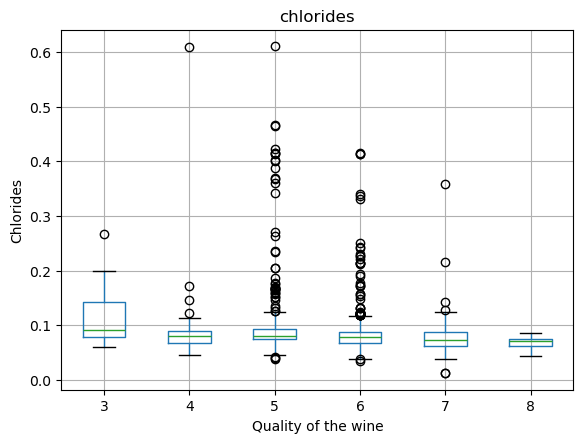

In [33]:
# a boxplot for different categories is built as follows:
ax = WINE.boxplot(by='quality',column='chlorides')
ax.set_xlabel('Quality of the wine')
ax.set_ylabel('Chlorides')
plt.suptitle('')

Categories 5 and 8 shows the more consistent chlorides percentage; however, 5th and 6th quality categories have the bigger numer of outliers. 

A __Violin Plot__ is an enhancement to the boxplot and plots the density estimate with the density on the y-axis. The advantage of a violing plot is that it can show nuances in the distribution that aren't perceptible in a box-plot. On the othe hand, the boxplot more clearly shows the aoutliers. 

Text(0, 0.5, 'Chlorides')

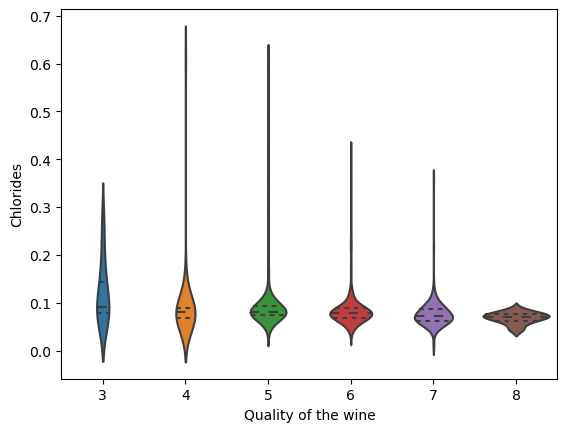

In [34]:
# A violin plot is built from the violinplot method in seaborn:
ax = sns.violinplot(data=WINE,x="quality",y="chlorides", inner='quartile')
ax.set_xlabel('Quality of the wine')
ax.set_ylabel('Chlorides')

### Visualizing multiple variables
The types of plots used to compare two variables - Scatterplots, Hexagonal binning, boxplots, and voilin plots -, are readily extended to more variables through the notion of _conditioning_. The concept of conditioning variables ins agraphic system was pioneered with Trellis graphics at Bell Labs. Conditioning variables are also integral to business intelligence platforms such as Tableau and Spotfire. 

## Summary
Exploratory Data Analysis (EDA) set the foundation for the field of data science. The key idea of EDA is that _the first and most important step in any project based on data is to look at the data_. By summarizing and visualizing the data, you can gain valuable intuition and understanding of the project.